## Visualization

## DATA IMPORT

In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(r"D:\Master Thesis New Data Set\CARE DATA SET\CARE_To_Compare\Wind Farm A\Wind Farm A\datasets\3.csv",delimiter=';')

# Display the contents of the file
print(df)


                time_stamp  asset_id     id  train_test  status_type_id  \
0      2022-04-27 03:00:00        10      0       train               0   
1      2022-04-27 03:10:00        10      1       train               0   
2      2022-04-27 03:20:00        10      2       train               0   
3      2022-04-27 03:30:00        10      3       train               0   
4      2022-04-27 03:40:00        10      4       train               5   
...                    ...       ...    ...         ...             ...   
55482  2023-05-19 00:30:00        10  55482  prediction               0   
55483  2023-05-19 00:40:00        10  55483  prediction               0   
55484  2023-05-19 00:50:00        10  55484  prediction               0   
55485  2023-05-19 01:00:00        10  55485  prediction               0   
55486  2023-05-19 01:10:00        10  55486  prediction               0   

       sensor_0_avg  sensor_1_avg  sensor_2_avg  wind_speed_3_avg  \
0              18.0          7

## Sensor Noise

In [3]:
max_power = df['sensor_50'].max()
min_power = df['sensor_50'].min()

print(f"Max Total Active Power: {max_power}")
print(f"Min Total Active Power: {min_power}")


Max Total Active Power: 334458.0
Min Total Active Power: -5367.0


In [4]:
negative_power_df = df[df['sensor_50'] < 0]
print(f"Number of records with negative power: {len(negative_power_df)}")


Number of records with negative power: 17439


In [5]:
positive_power_df = df[df['sensor_50'] > 0]
print(f"Number of records with positive power: {len(positive_power_df)}")

Number of records with positive power: 38048


## Active Power to Zero from negative values

In [7]:
# Set negative power values to zero
df['sensor_50'] = df['sensor_50'].apply(lambda x: max(x, 0))

# Now you can proceed with your analysis, like finding the cut-in wind speed


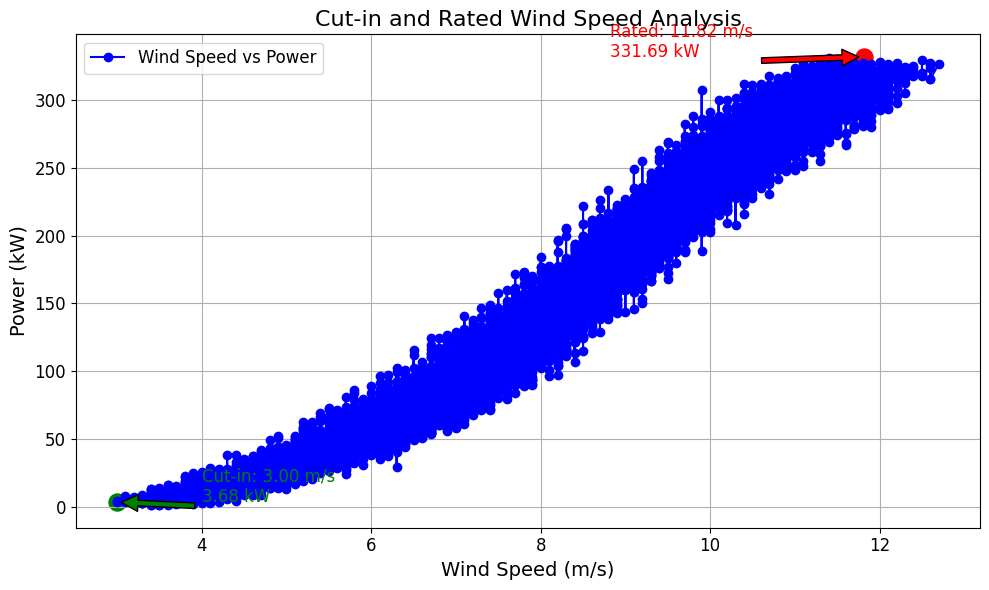

Cut-in Wind Speed: 3.00 m/s
Power at Cut-in: 3.68 kW
Rated Power 99%: 331.69 kW at 11.82 m/s wind speed


In [8]:
import matplotlib.pyplot as plt

# Step 1: Filter data based on pitch and nacelle angle
df_filtered = df[
    (df['sensor_5_avg'] <= 2) & 
    (df['sensor_5_avg'] >= -5) & 
    (df['status_type_id'] == 0) 
]

# Step 2: Remove any NaNs and sort by wind speed
df_filtered = df_filtered.dropna(subset=['wind_speed_3_avg', 'sensor_50'])
df_sorted = df_filtered.sort_values(by='wind_speed_3_avg')

# Convert power from W to kW
df_sorted['sensor_50'] = df_sorted['sensor_50'] / 1000

# Step 3: Find cut-in wind speed and power
positive_power_df = df_sorted[df_sorted['sensor_50'] > 0]
cut_in_wind_speed = positive_power_df['wind_speed_3_avg'].min()
cut_in_power = positive_power_df[positive_power_df['wind_speed_3_avg'] == cut_in_wind_speed]['sensor_50'].values[0]

# Step 4: Rated power info
rated_power = df_sorted['sensor_50'].max()
target_power = 0.98 * rated_power
rated_power_df = df_sorted[df_sorted['sensor_50'] >= target_power]
rated_power_wind_speed = rated_power_df['wind_speed_3_avg'].mean()

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['wind_speed_3_avg'], df_sorted['sensor_50'],
         marker='o', linestyle='-', color='b', label='Wind Speed vs Power')

# Highlight cut-in point with larger green dot
plt.scatter(cut_in_wind_speed, cut_in_power, color='green', s=150)

# Arrow annotation for cut-in
plt.annotate(f'Cut-in: {cut_in_wind_speed:.2f} m/s\n{cut_in_power:.2f} kW',
             xy=(cut_in_wind_speed, cut_in_power), 
             xytext=(cut_in_wind_speed + 1, cut_in_power + 0.05),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, color='green')

# Highlight rated power point with larger red dot
plt.scatter(rated_power_wind_speed, rated_power, color='red', s=150)

# Arrow annotation for rated power
plt.annotate(f'Rated: {rated_power_wind_speed:.2f} m/s\n{rated_power:.2f} kW',
             xy=(rated_power_wind_speed, rated_power),
             xytext=(rated_power_wind_speed - 3, rated_power - 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Axis labels with larger font size
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.ylabel('Power (kW)', fontsize=14)

# Increase tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Cut-in and Rated Wind Speed Analysis', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Save plot as PNG
plt.savefig('wind_speed_power_analysis.png', dpi=300)

plt.show()

# Step 6: Print key values
print(f"Cut-in Wind Speed: {cut_in_wind_speed:.2f} m/s")
print(f"Power at Cut-in: {cut_in_power:.2f} kW")
print(f"Rated Power 99%: {rated_power:.2f} kW at {rated_power_wind_speed:.2f} m/s wind speed")


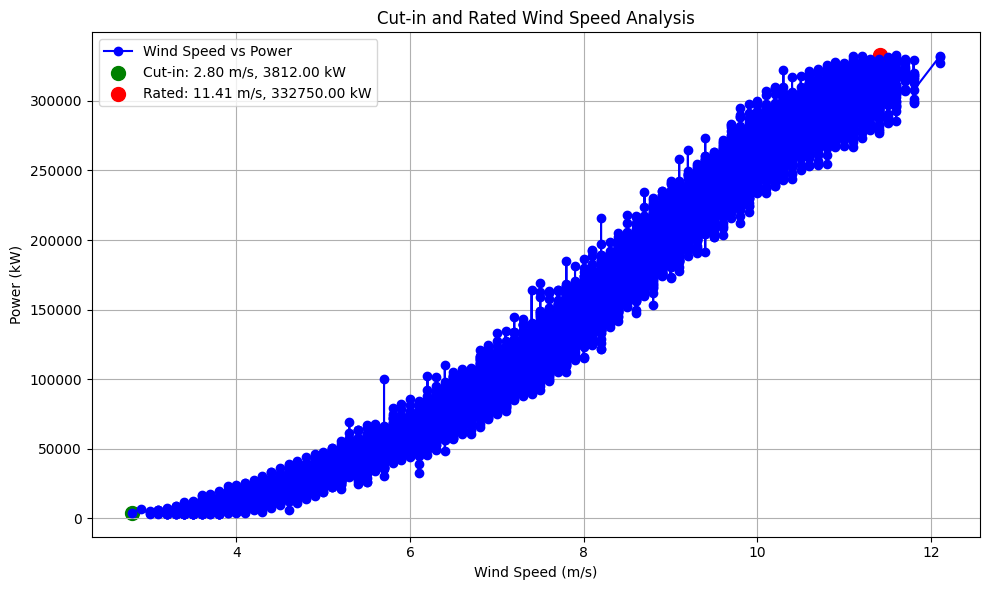

Cut-in Wind Speed: 2.80 m/s
Power at Cut-in: 3812.00 kW
Rated Power 99%: 332750.00 kW at 11.41 m/s wind speed


In [6]:
import matplotlib.pyplot as plt

# Step 1: Filter data based on pitch and nacelle angle
df_filtered = df[
    (df['sensor_5_avg'] <= 2) & 
    (df['sensor_5_avg'] >= -5) & 
    (df['status_type_id'] == 0) 
]

# Step 2: Remove any NaNs and sort by wind speed
df_filtered = df_filtered.dropna(subset=['wind_speed_3_avg', 'sensor_50'])
df_sorted = df_filtered.sort_values(by='wind_speed_3_avg')

# Step 3: Find cut-in wind speed and power
positive_power_df = df_sorted[df_sorted['sensor_50'] > 0]
cut_in_wind_speed = positive_power_df['wind_speed_3_avg'].min()
cut_in_power = positive_power_df[positive_power_df['wind_speed_3_avg'] == cut_in_wind_speed]['sensor_50'].values[0]



rated_power = df_sorted['sensor_50'].max()
target_power = 0.98 * rated_power
rated_power_df = df_sorted[df_sorted['sensor_50'] >= target_power]
rated_power_wind_speed = rated_power_df['wind_speed_3_avg'].mean()

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['wind_speed_3_avg'], df_sorted['sensor_50'],
         marker='o', linestyle='-', color='b', label='Wind Speed vs Power')

# Highlight cut-in point
plt.scatter(cut_in_wind_speed, cut_in_power, color='green', s=100,
            label=f'Cut-in: {cut_in_wind_speed:.2f} m/s, {cut_in_power:.2f} kW')

# Highlight rated power point
plt.scatter(rated_power_wind_speed, rated_power, color='red', s=100,
            label=f'Rated: {rated_power_wind_speed:.2f} m/s, {rated_power:.2f} kW')

# Final touches
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Cut-in and Rated Wind Speed Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Print key values
print(f"Cut-in Wind Speed: {cut_in_wind_speed:.2f} m/s")
print(f"Power at Cut-in: {cut_in_power:.2f} kW")
print(f"Rated Power 99%: {rated_power:.2f} kW at {rated_power_wind_speed:.2f} m/s wind speed")


In [7]:
import numpy as np
from scipy.optimize import fsolve

# Known values
target_power = cut_in_power  # Desired power at 3.2 m/s
rated_speed = rated_power_wind_speed
wind_speed = cut_in_wind_speed

# Define the equation to solve
def equation(cut_in):
    return rated_power * ((wind_speed - cut_in) / (rated_speed - cut_in))**3 - target_power

# Initial guess for cut_in
initial_guess = 1.0

# Solve for cut_in
cut_in_solution = fsolve(equation, initial_guess)[0]
print(f"Required cut-in wind speed: {cut_in_solution:.4f} m/s")


Required cut-in wind speed: 0.2938 m/s


In [8]:
cut_in = cut_in_solution

Status Type ID Distribution Before Change:
status_type_id
0    30407
4     2972
3      695
5      680
Name: count, dtype: int64


C:\Users\49157\AppData\Local\Temp\ipykernel_4724\626401009.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['status_type_id'] = df_filtered.apply(reassign_status, axis=1)
C:\Users\49157\AppData\Local\Temp\ipykernel_4724\626401009.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['status_type_id'] = df_filtered.apply(reassign_status, axis=1)



Status Type ID Distribution After Change:
status_type_id
0    30656
5     4051
3       43
4        4
Name: count, dtype: int64


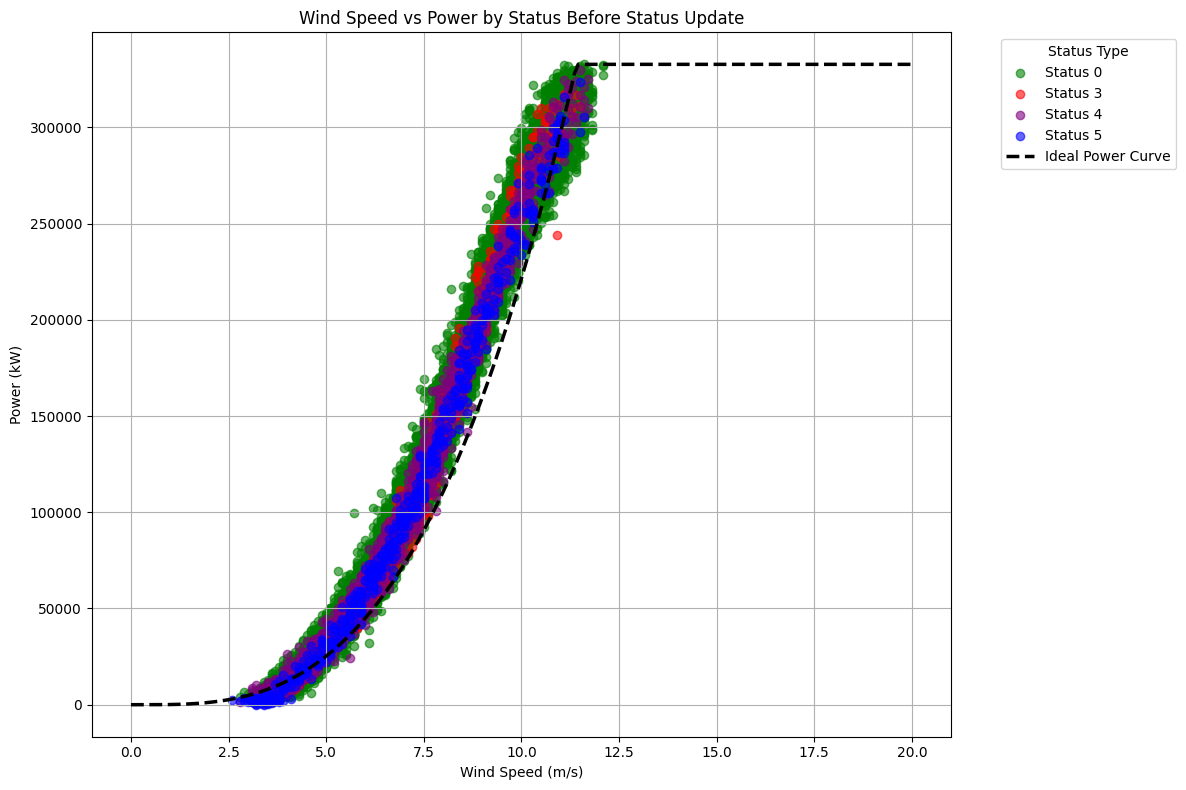

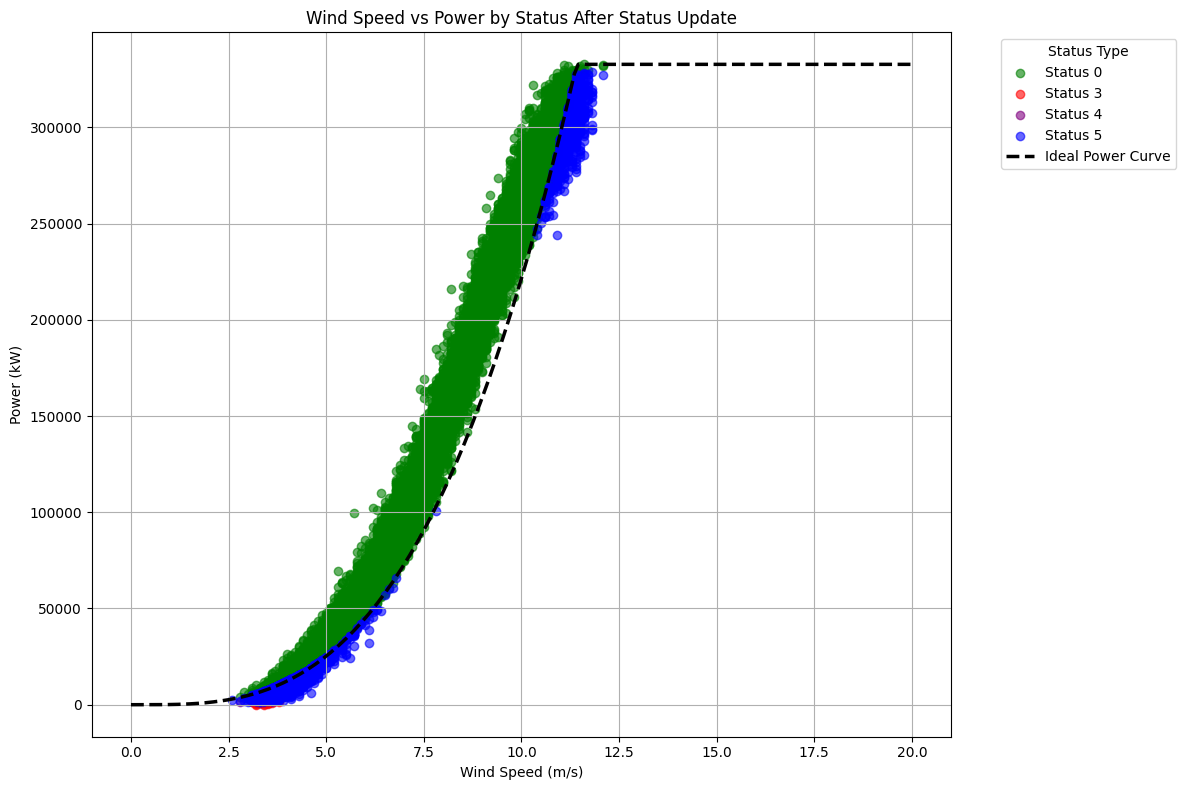

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Filter data
df_filtered = df[
    (df['sensor_5_avg'] <= 2) & 
    (df['sensor_5_avg'] >= -5) & 
    (df['sensor_2_avg'] >= -180) & 
    (df['sensor_2_avg'] <= 180) 
]

# --- Step 1.1: Check the status_id distribution before change
print("Status Type ID Distribution Before Change:")
print(df_filtered['status_type_id'].value_counts())

# --- Step 2: Save the plot before the status change
plt.figure(figsize=(12, 8))

# Define colors for each status type
status_colors = {0: 'green', 3: 'red', 4: 'purple', 5: 'blue'}

# Plot data for each status type (0, 3, 5)
for status, color in status_colors.items():
    status_group = df_filtered[df_filtered['status_type_id'] == status]
    plt.scatter(status_group['wind_speed_3_avg'], status_group['sensor_50'], 
                c=color, label=f'Status {status}', alpha=0.6)

# Compute ideal power curve
wind_speeds = np.linspace(0, 20, 200)

ideal_power = np.piecewise(
    wind_speeds,
    [wind_speeds < cut_in,
     (wind_speeds >= cut_in) & (wind_speeds < rated_speed),
     wind_speeds >= rated_speed],
    [0,
     lambda x: rated_power * ((x - cut_in) / (rated_speed - cut_in))**3,
     rated_power]
)

# Plot the ideal power curve
plt.plot(wind_speeds, ideal_power, color='black', linewidth=2.5, linestyle='--', label='Ideal Power Curve')

# Final plot formatting
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Wind Speed vs Power by Status Before Status Update')
plt.legend(title='Status Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the plot before status change
plt.savefig('before_status_update.png')

# Define the ideal power curve function
def get_ideal_power(wind_speed):
    if wind_speed < cut_in:
        return 0
    elif wind_speed < rated_speed:
        return rated_power * ((wind_speed - cut_in) / (rated_speed - cut_in))**3
    else:
        return rated_power

def reassign_status(row):
    wind_speed = row['wind_speed_3_avg']
    actual_power = row['sensor_50']
    ideal_power = get_ideal_power(wind_speed)
    current_status = row['status_type_id']

    # Step 1: Keep status unchanged for wind speed <= 3 m/s
    if wind_speed <= 3:
        return current_status  # Keep existing status

    # Step 2: Apply classification for wind speed > 3 m/s
    if actual_power == 0 or (actual_power > 0 and actual_power < 2000):
        if current_status in [3, 4]:
            return current_status  # Keep status 3 or 4 as-is
        else:
            return 3  # Assign to very low power if current status is not 3 or 4
    elif actual_power >= ideal_power * 0.99:
        return 0  # Normal/healthy
    else:
        return 5  # Underperforming

# Apply the updated reassignment logic
df_filtered['status_type_id'] = df_filtered.apply(reassign_status, axis=1)


# Apply the status assignment
df_filtered['status_type_id'] = df_filtered.apply(reassign_status, axis=1)

# --- Step 1.2: Check the status_id distribution after change
print("\nStatus Type ID Distribution After Change:")
print(df_filtered['status_type_id'].value_counts())

# --- Step 4: Save the plot after the status change
plt.figure(figsize=(12, 8))

# Plot data for each status type (0, 3, 5)
for status, color in status_colors.items():
    status_group = df_filtered[df_filtered['status_type_id'] == status]
    plt.scatter(status_group['wind_speed_3_avg'], status_group['sensor_50'], 
                c=color, label=f'Status {status}', alpha=0.6)

# Plot the ideal power curve
plt.plot(wind_speeds, ideal_power, color='black', linewidth=2.5, linestyle='--', label='Ideal Power Curve')

# Final plot formatting
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Wind Speed vs Power by Status After Status Update')
plt.legend(title='Status Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the plot after status change
plt.savefig('after_status_update.png')

# Display the final plot
plt.show()



Summary of Status Counts by Pitch Bin:

Pitch Bin: -5-0°
   Before  After
0   26811  28796
3     617      0
4    2705      0
5     422   1759

Pitch Bin: 0-5°
   Before  After
0    5202   1899
3     111      6
4     385     16
5     545   4322

Pitch Bin: 5-10°
   Before  After
0    1570   1204
3      35     16
4     168     65
5     757   1245

Pitch Bin: 10-15°
   Before  After
0     479    592
3      28     25
4     130     82
5     988    926

Pitch Bin: 15-20°
   Before  After
0      76    159
3      15     14
4      79     74
5     722    645

Pitch Bin: 20-25°
   Before  After
0    3282   3272
3      58     57
4    1336   1334
5    6209   6222

Pitch Bin: 25-30°
   Before  After
0      14     15
3       2      1
4      10      9
5      56     57

Pitch Bin: 30-35°
   Before  After
0       6      6
4       9      7
5      52     54

Pitch Bin: 35-40°
   Before  After
0       6      5
3       3      3
4       7      5
5      46     49

Pitch Bin: 40-45°
   Before  After
0       4

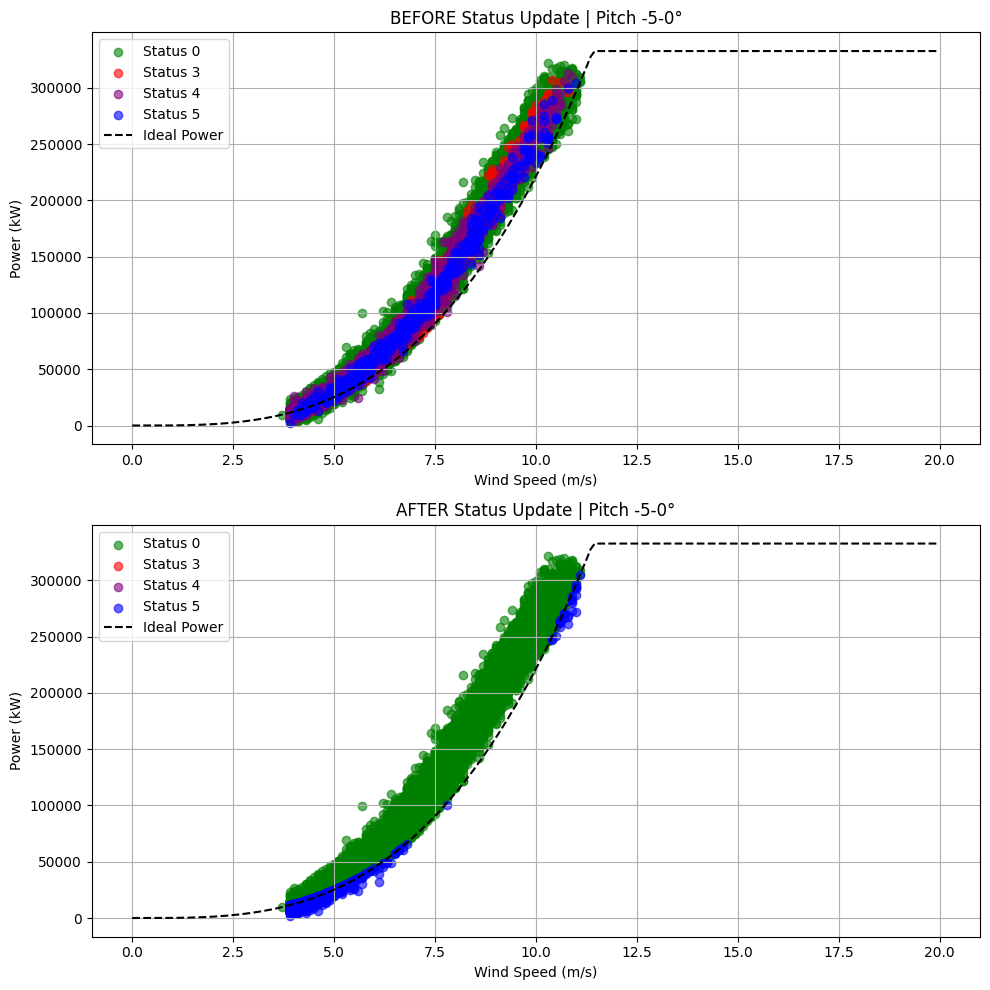

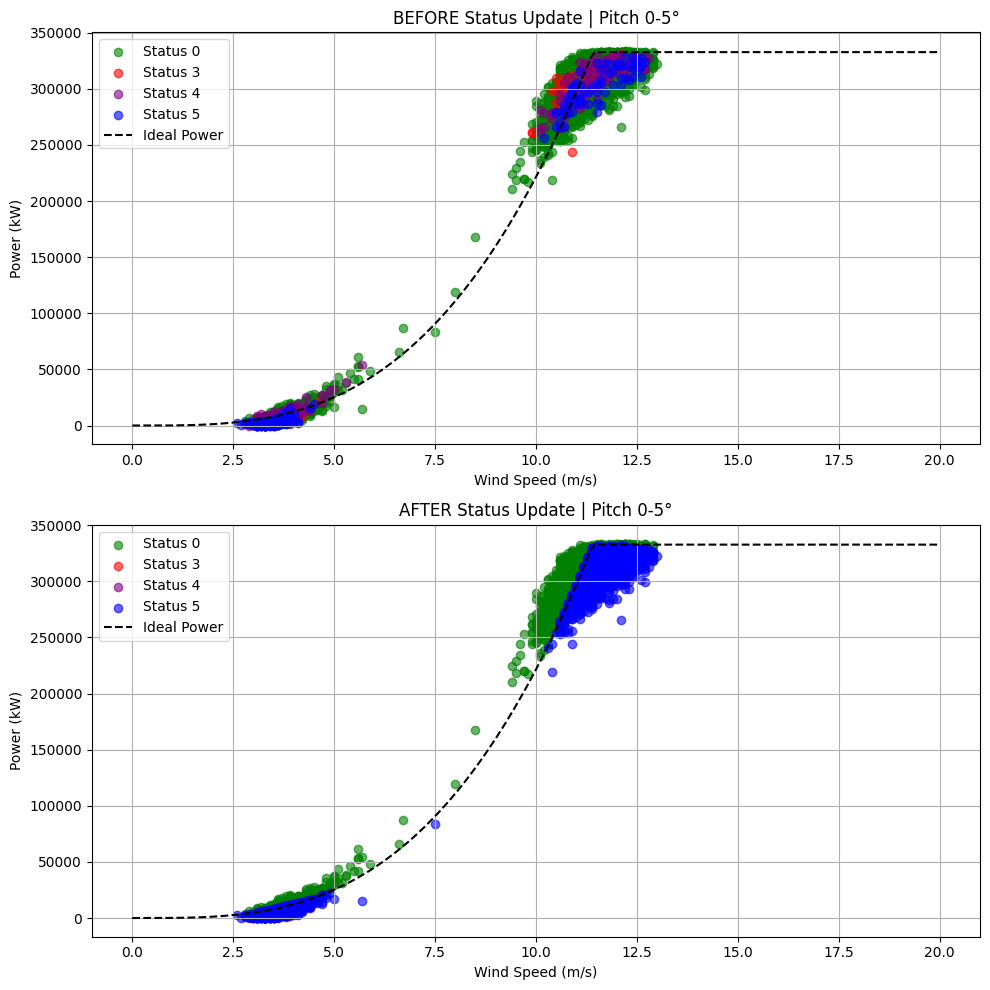

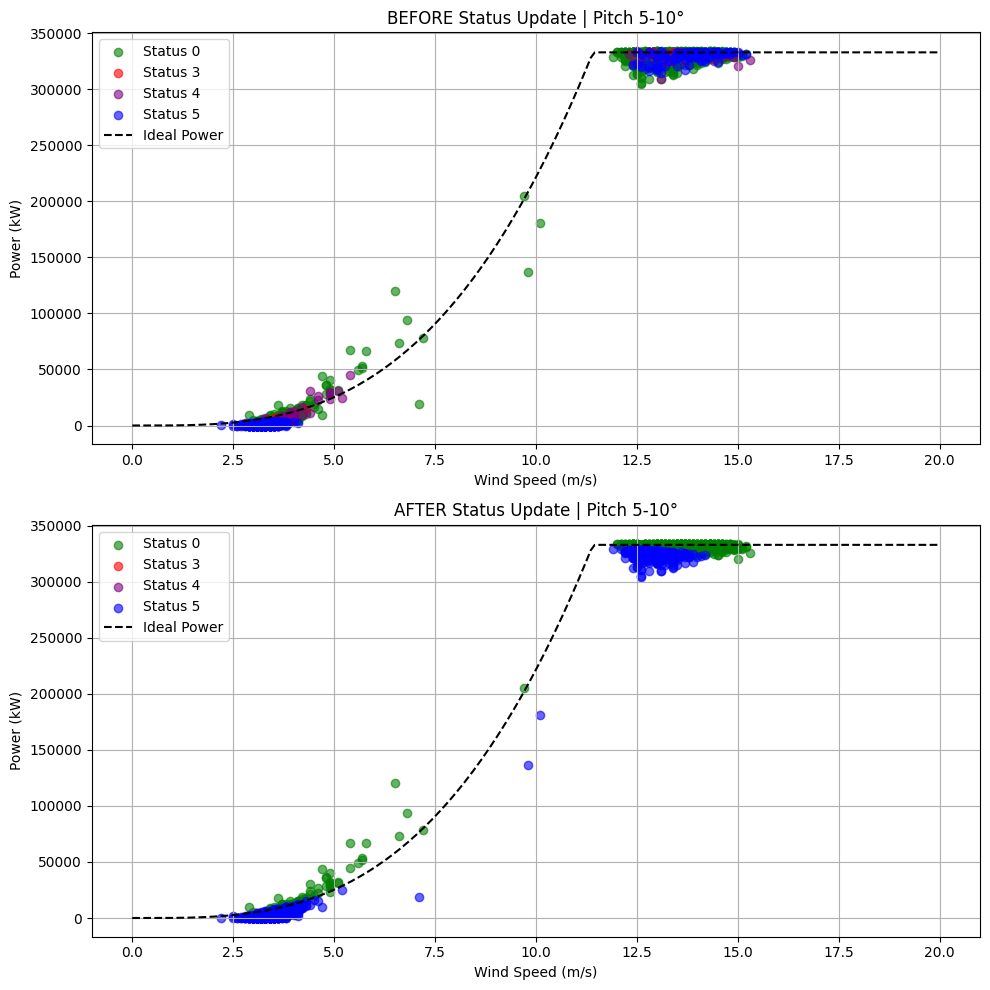

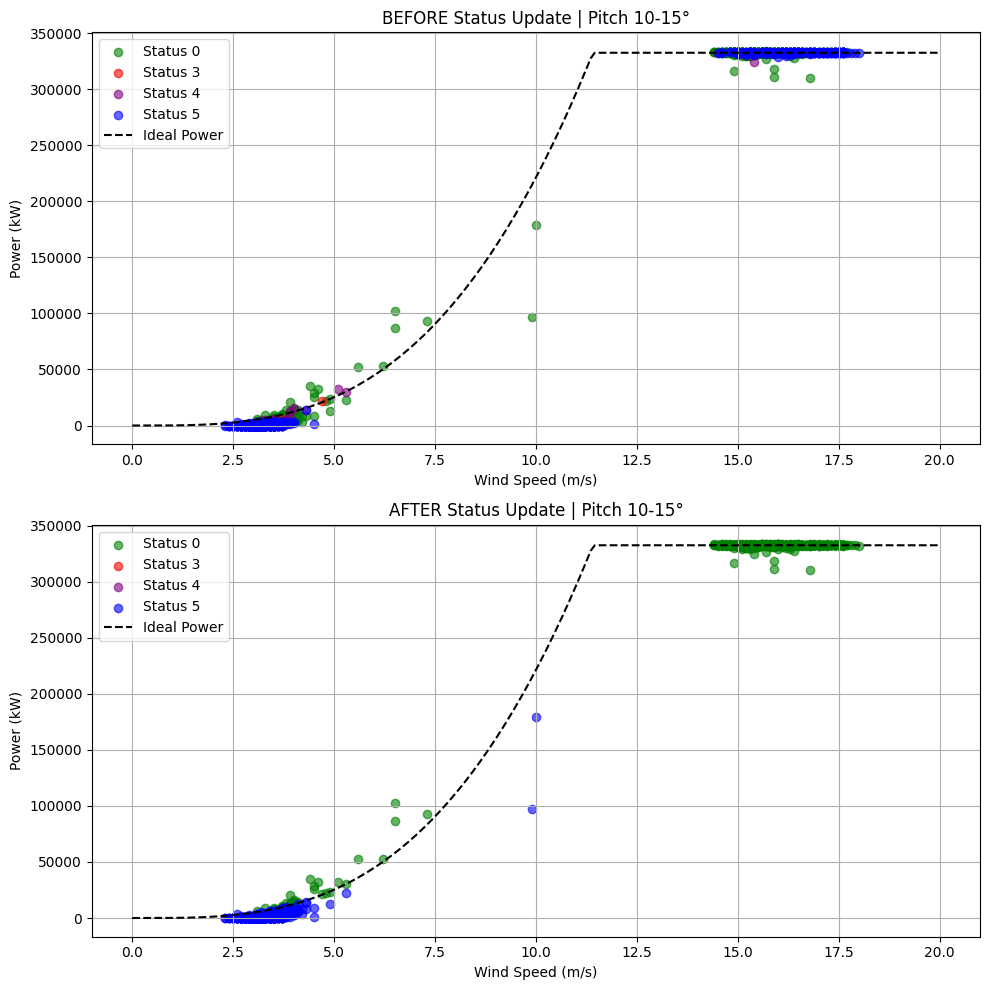

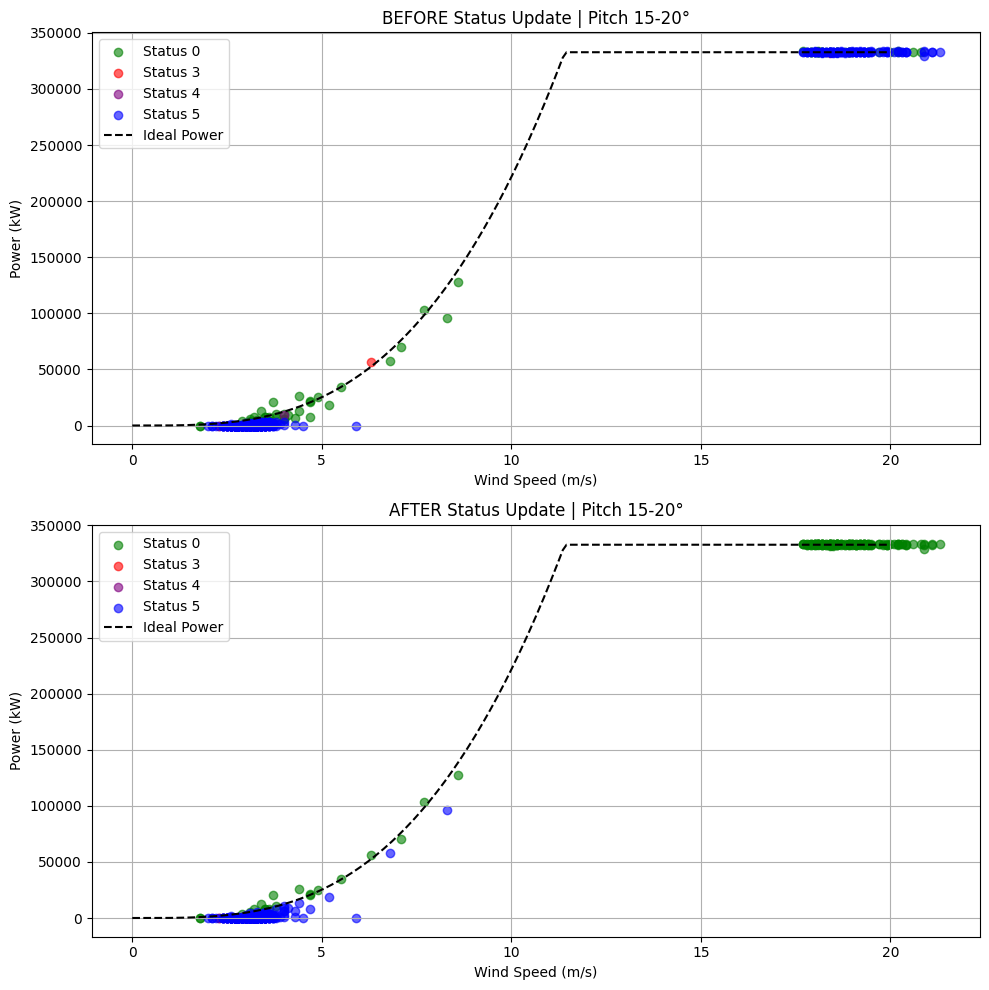

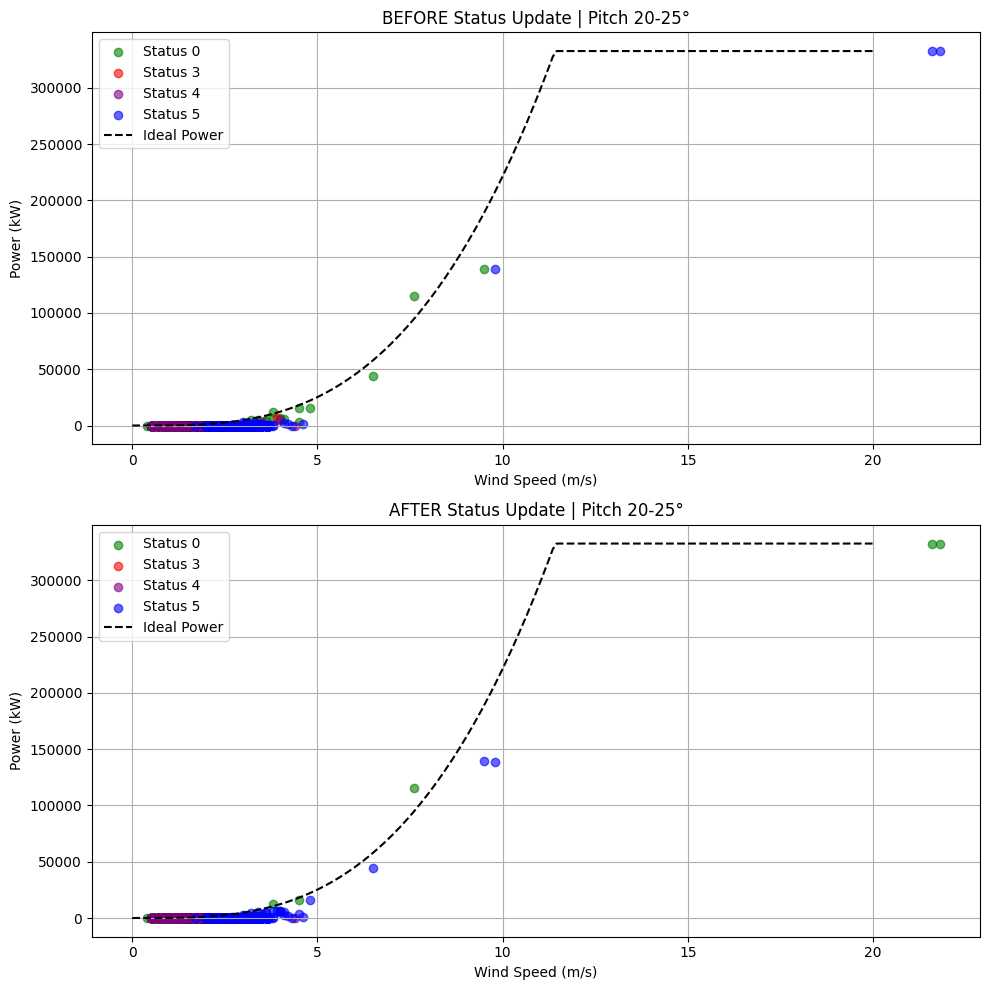

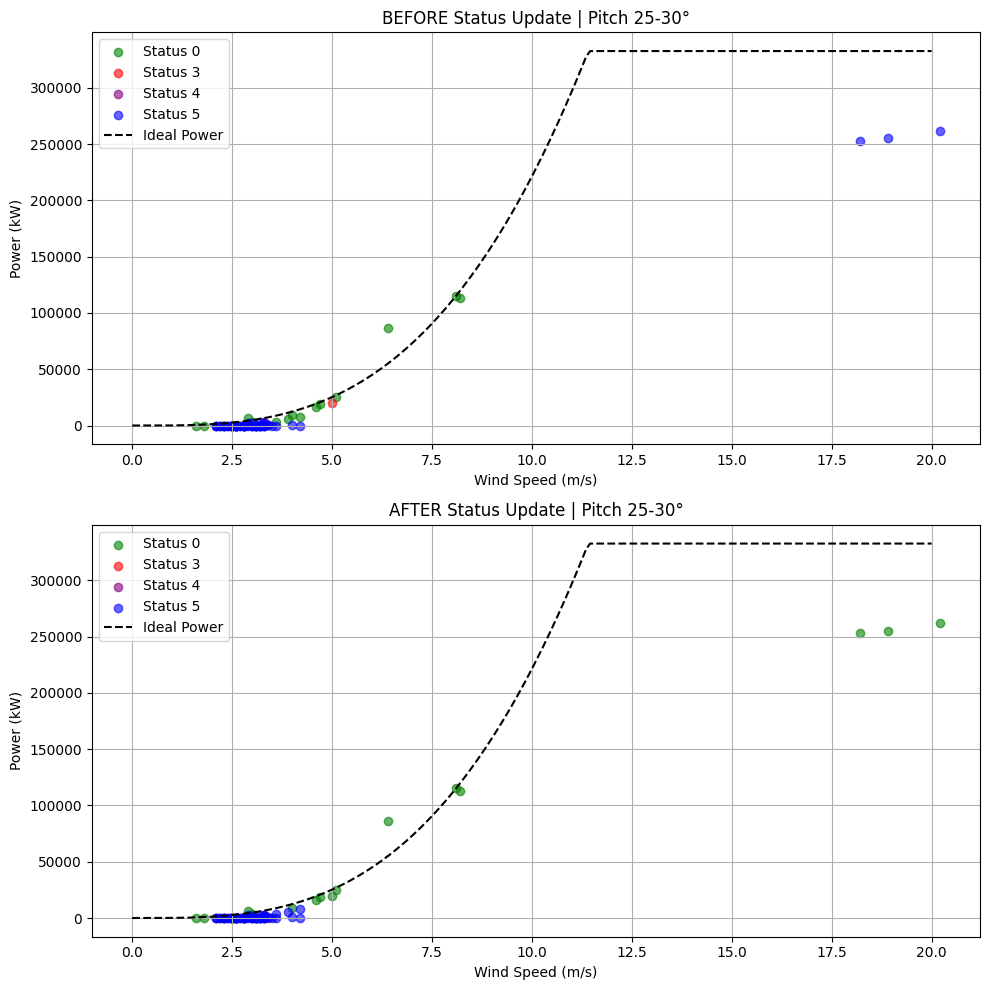

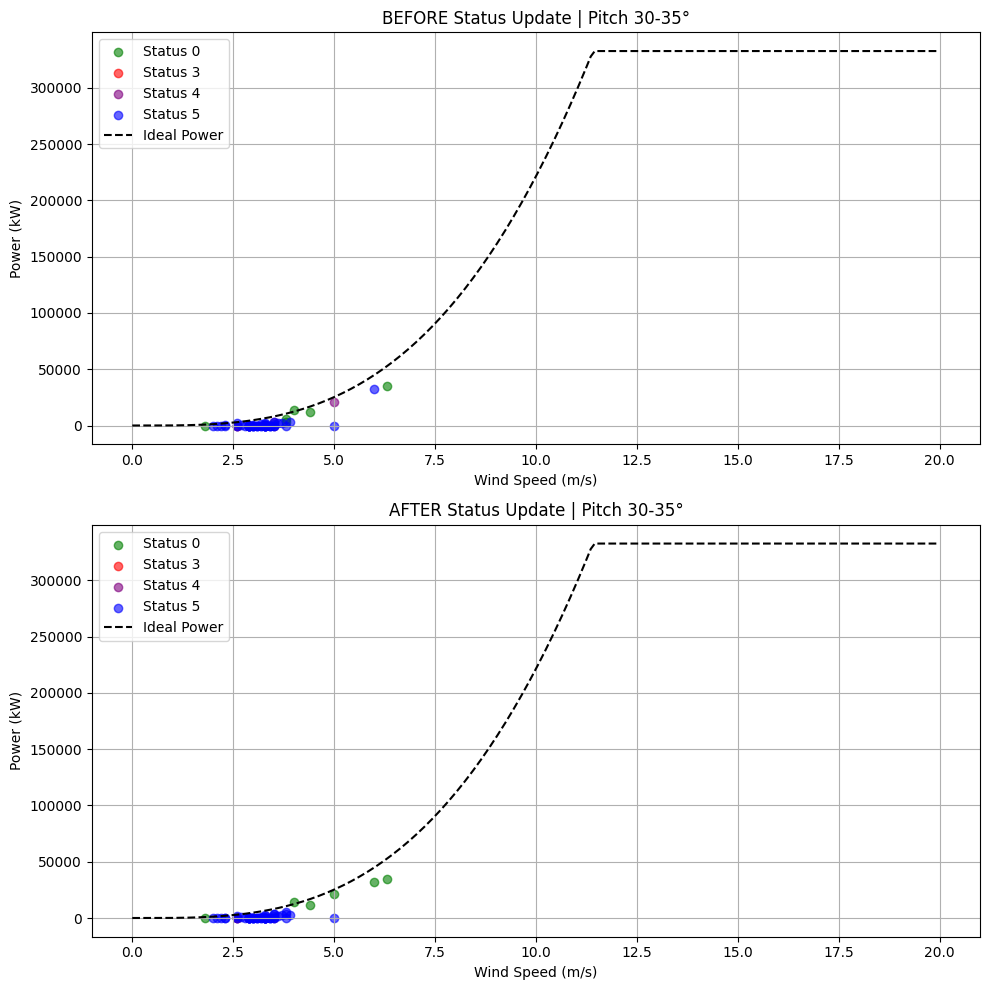

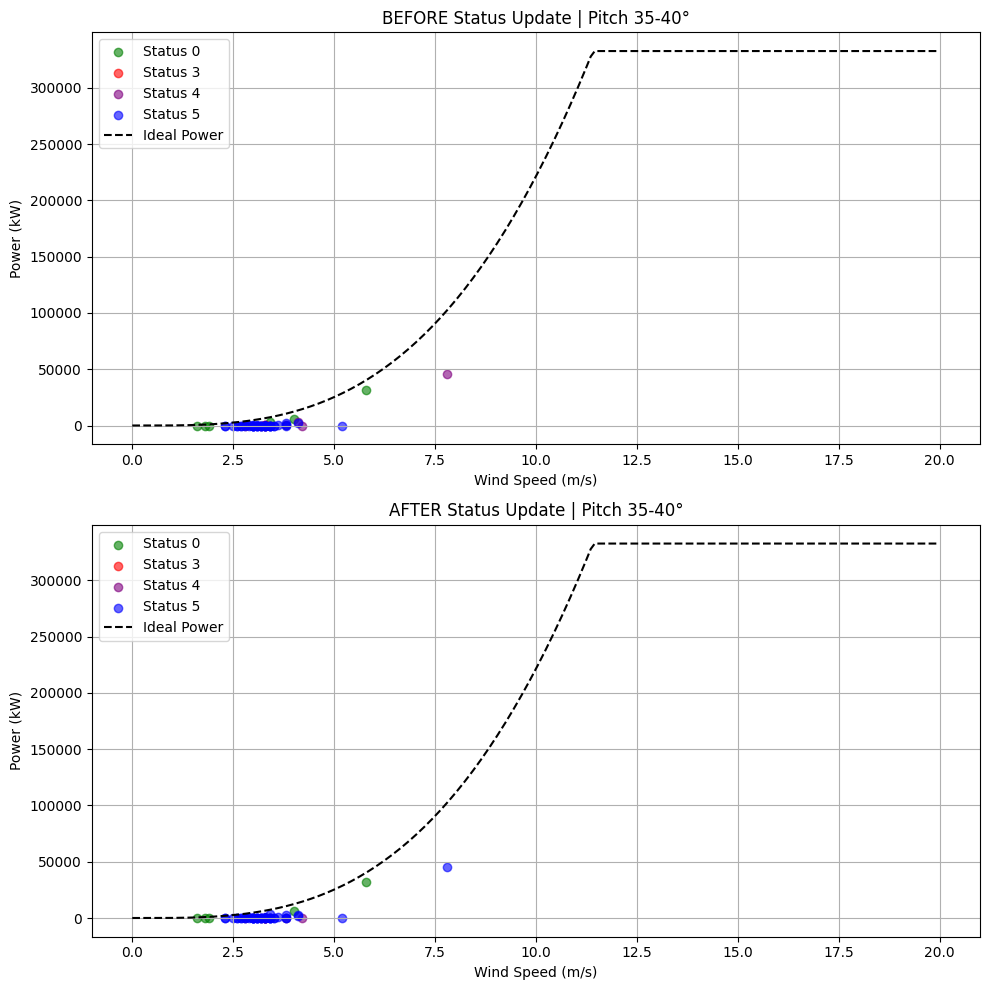

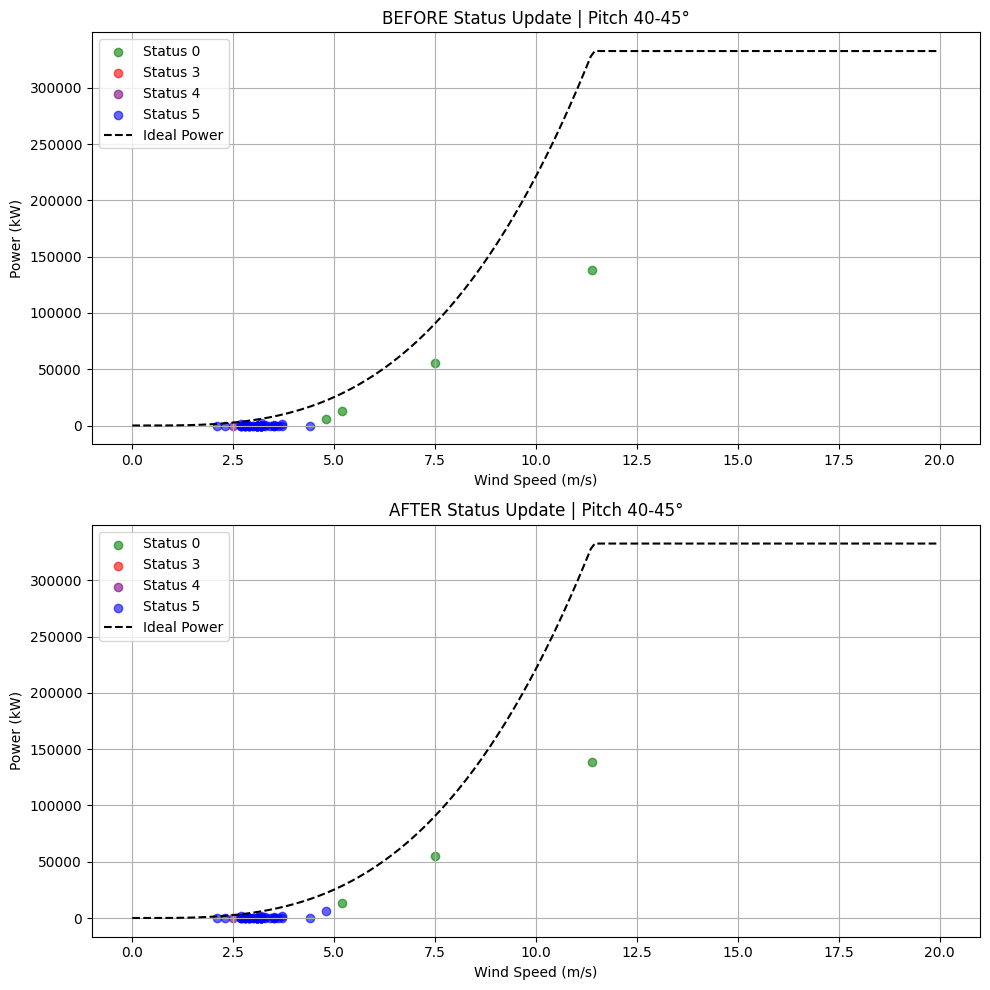

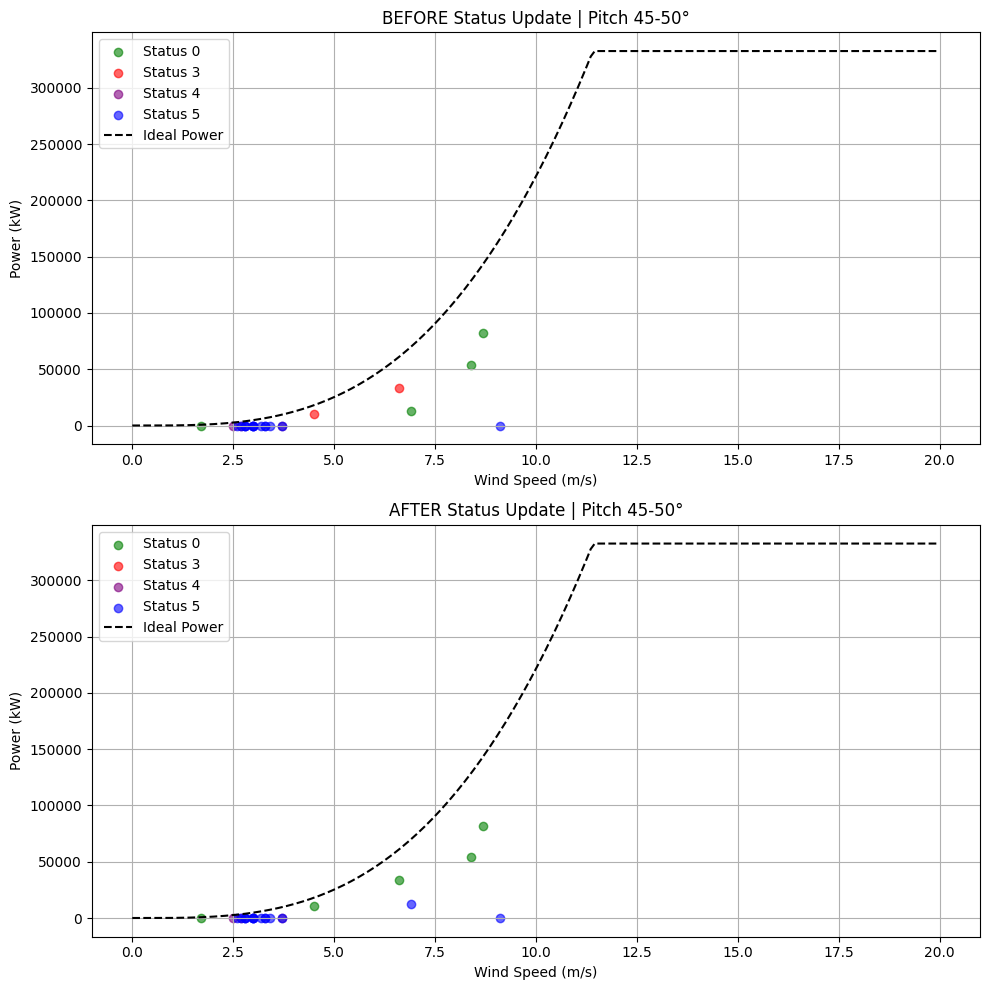

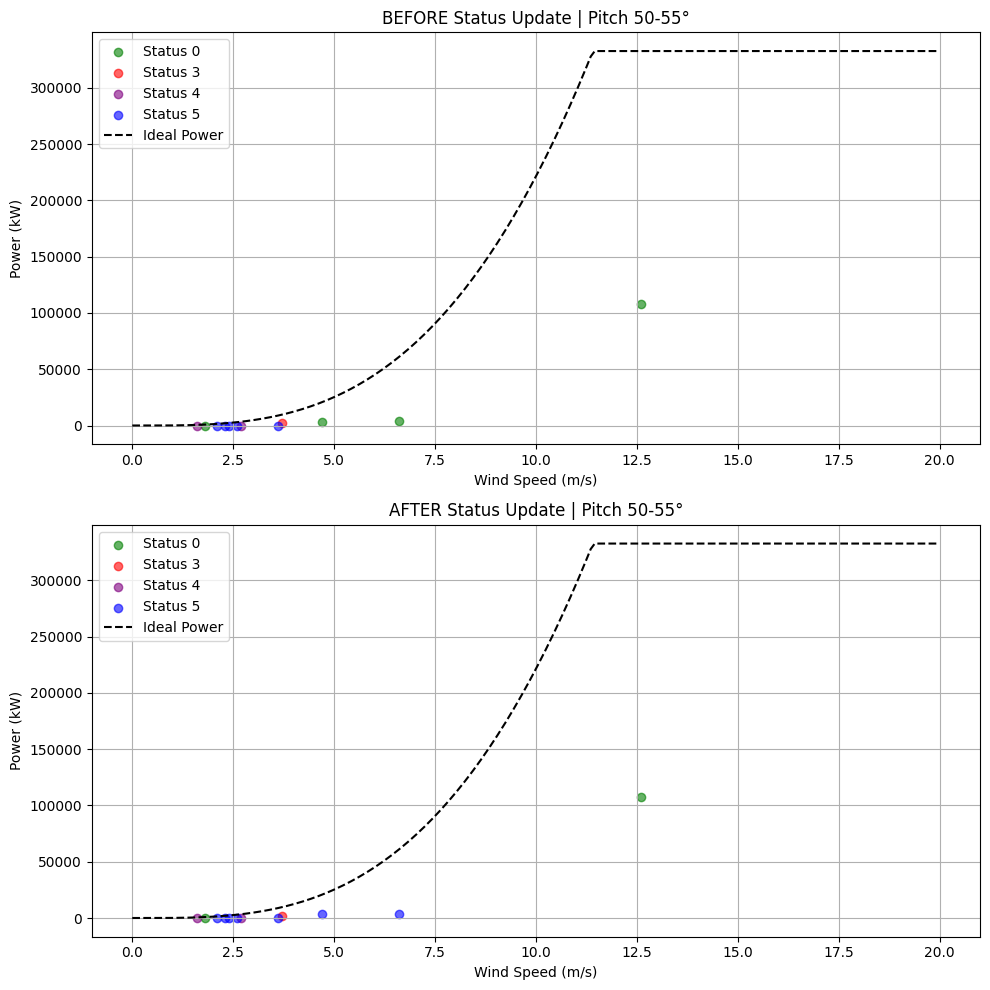

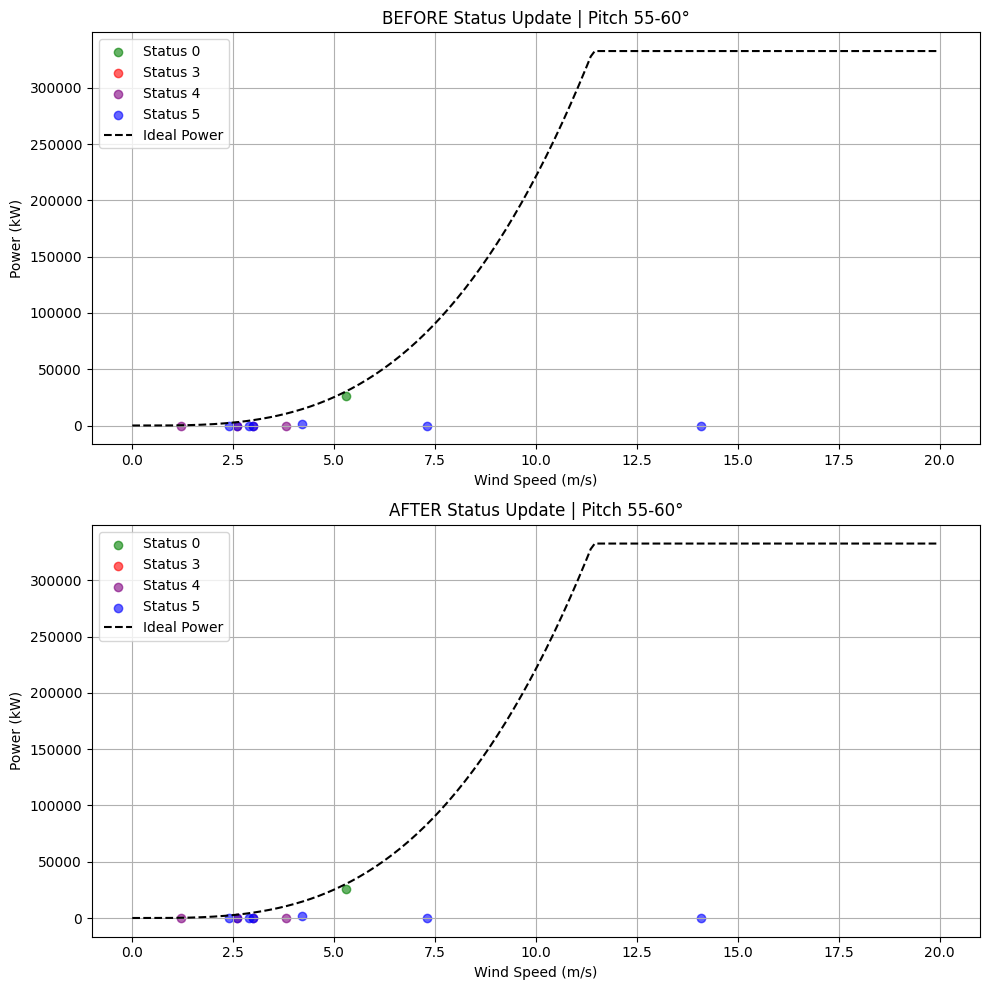

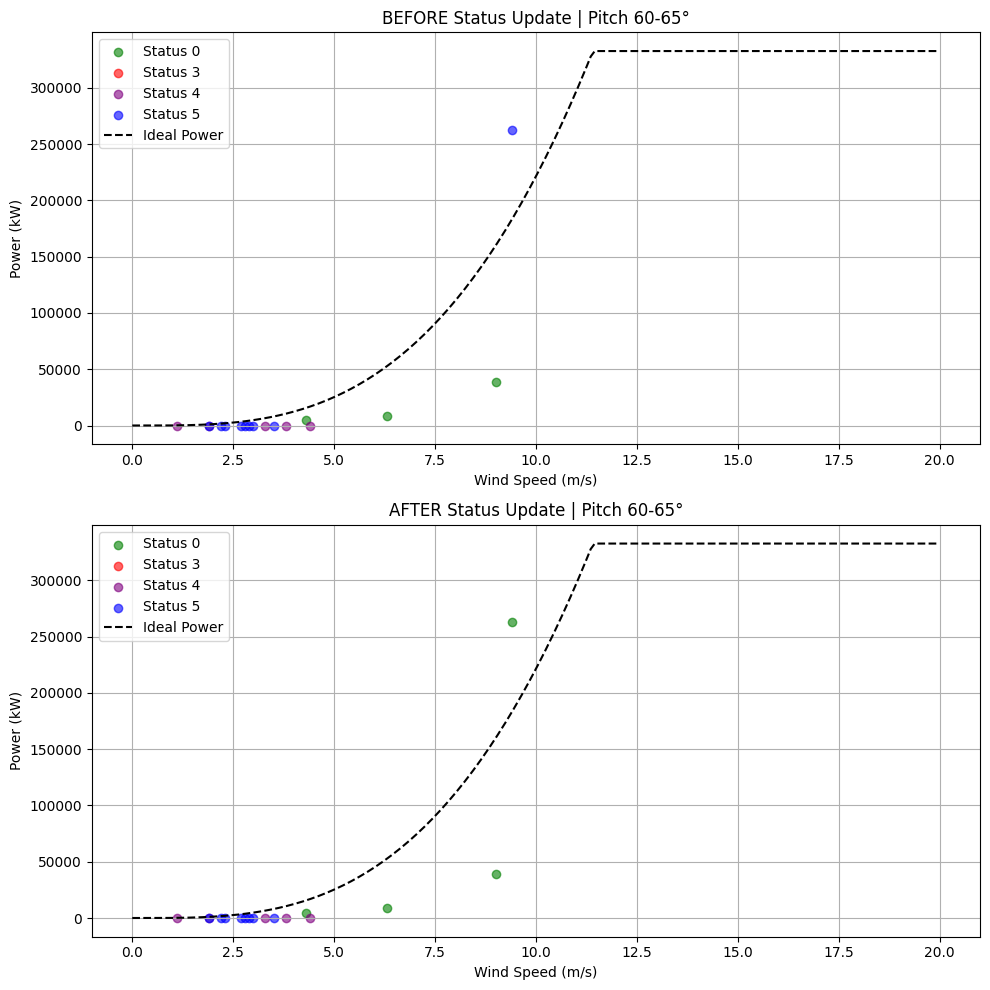

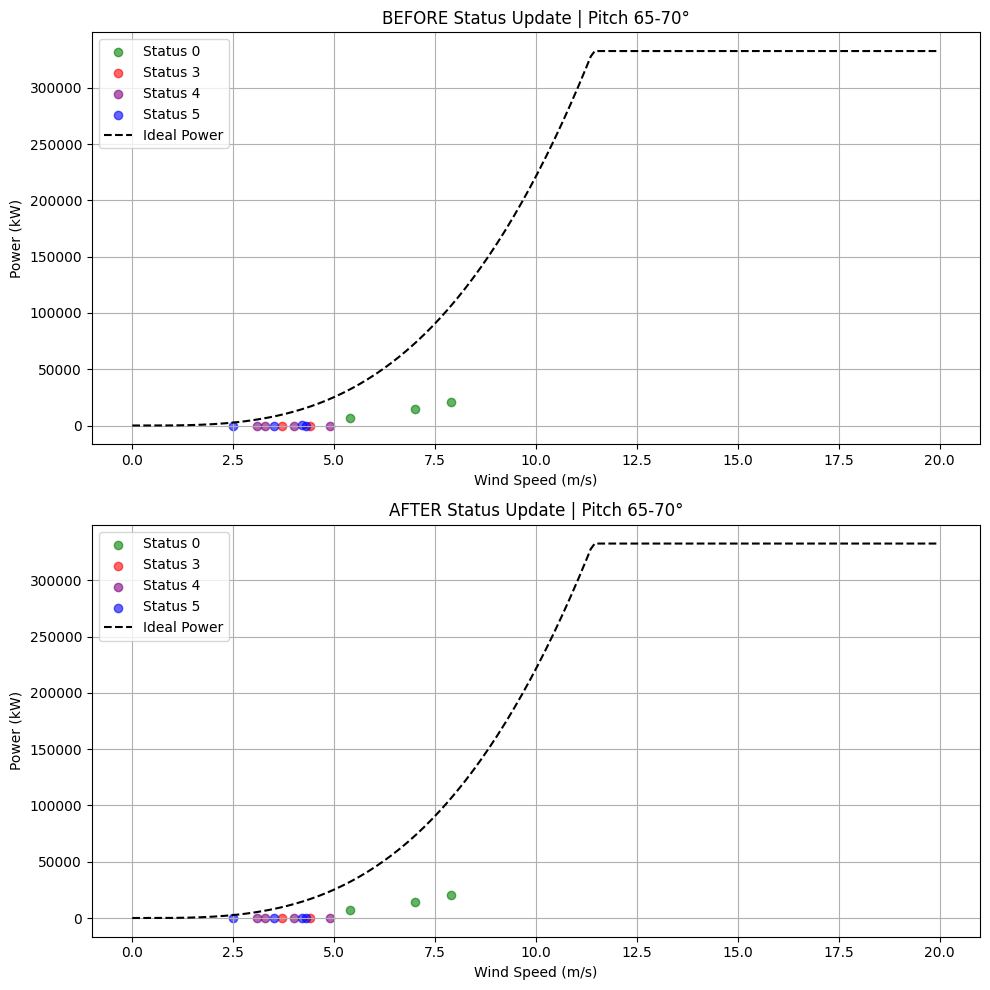

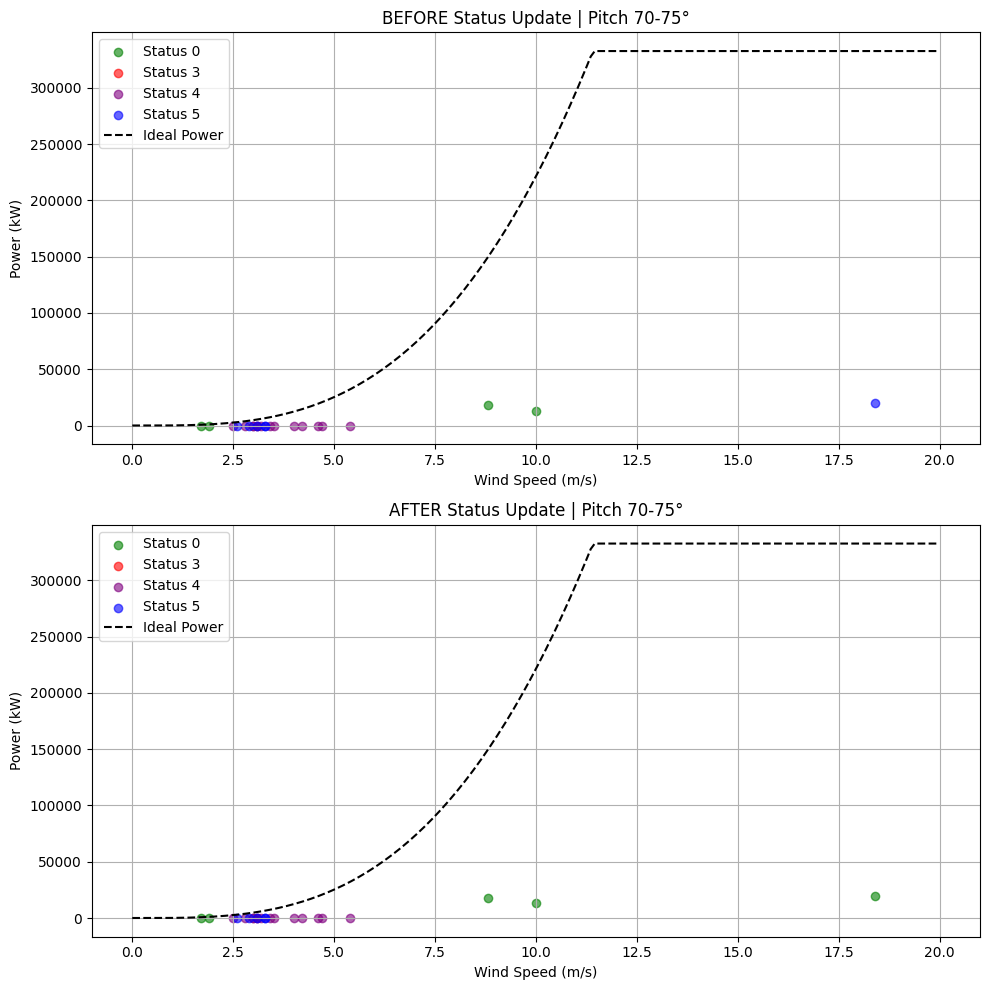

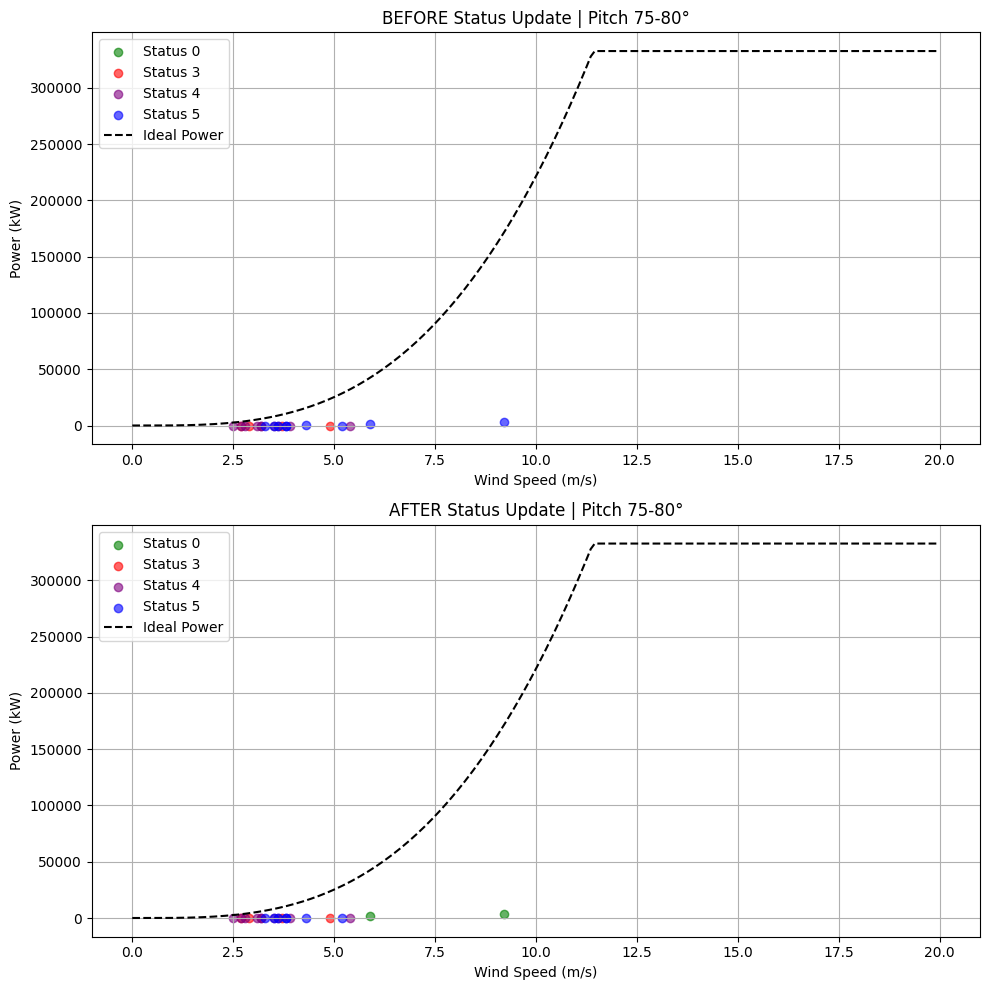

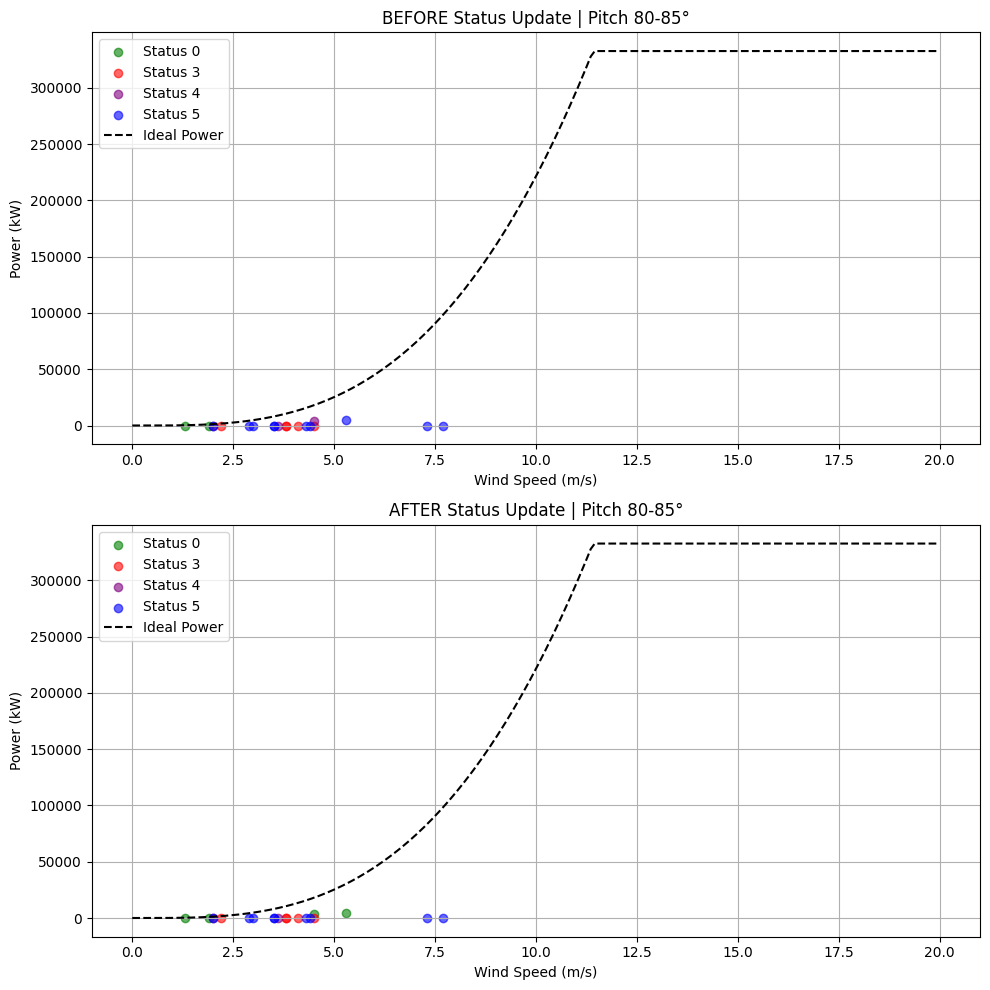

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Filter data
df_filtered = df[
    (df['sensor_5_avg'] <= 90) & 
    (df['sensor_5_avg'] >= -5) & 
    (df['sensor_2_avg'] >= -180) & 
    (df['sensor_2_avg'] <= 180)
].copy()

# Step 2: Bin pitch angles into 5° intervals
pitch_bins = np.arange(-5, 90, 5)
pitch_labels = [f"{i}-{i+5}°" for i in pitch_bins[:-1]]
df_filtered['pitch_bin'] = pd.cut(df_filtered['sensor_5_avg'], bins=pitch_bins, labels=pitch_labels, right=False)

# Step 3: Save original status for comparison
df_filtered['status_before'] = df_filtered['status_type_id']

# Define the ideal power curve function
def get_ideal_power(wind_speed):
    if wind_speed < cut_in:
        return 0
    elif wind_speed < rated_speed:
        return rated_power * ((wind_speed - cut_in) / (rated_speed - cut_in))**3
    else:
        return rated_power


# Step 5: Reassign status based on cosine^3(pitch angle) tolerance
def reassign_status(row):
    wind_speed = row['wind_speed_3_avg']
    pitch_deg = row['sensor_5_avg']
    actual_power = row['sensor_50']
    current_status = row['status_before']

    # Keep original status for high pitch angles (85–90°)
    if 85 <= pitch_deg <= 90:
        return current_status

    # Keep original status for low wind speeds
    if wind_speed <= 3:
        return current_status

    # Preserve status 3 or 4 if actual_power <= 2000
    if current_status in [3, 4]:
        if actual_power <= 2000:
            return current_status
        else:
            # Reclassify based on ideal power logic
            ideal_power = get_ideal_power(wind_speed)
            pitch_rad = np.deg2rad(pitch_deg)
            tolerance_multiplier = np.cos(pitch_rad) ** 3
            threshold = ideal_power * tolerance_multiplier
            if actual_power >= threshold:
                return 0  # Healthy
            else:
                return 5  # Underperforming

    # For all other statuses, apply ideal power threshold directly
    ideal_power = get_ideal_power(wind_speed)
    pitch_rad = np.deg2rad(pitch_deg)
    tolerance_multiplier = np.cos(pitch_rad) ** 3
    threshold = ideal_power * tolerance_multiplier

    if actual_power >= threshold:
        return 0  # Healthy
    else:
        return 5  # Underperforming




# Apply updated status logic
df_filtered['status_type_id'] = df_filtered.apply(reassign_status, axis=1)

# Step 6: Print status count summary per pitch bin
summary_tables = {}

print("\nSummary of Status Counts by Pitch Bin:")
for label in pitch_labels:
    group = df_filtered[df_filtered['pitch_bin'] == label]
    if group.empty:
        continue
    summary = pd.DataFrame({
        'Before': group['status_before'].value_counts().sort_index(),
        'After': group['status_type_id'].value_counts().sort_index()
    }).fillna(0).astype(int)
    summary_tables[label] = summary
    print(f"\nPitch Bin: {label}")
    print(summary)

# Step 7: Define ideal curve values for plotting
wind_speeds = np.linspace(0, 20, 200)
ideal_power = np.piecewise(
    wind_speeds,
    [wind_speeds < cut_in,
     (wind_speeds >= cut_in) & (wind_speeds < rated_speed),
     wind_speeds >= rated_speed],
    [0,
     lambda x: rated_power * ((x - cut_in) / (rated_speed - cut_in))**3,
     rated_power]
)

# Step 8: Define status colors
status_colors = {0: 'green', 3: 'red', 4: 'purple', 5: 'blue'}

for label in pitch_labels:
    group = df_filtered[df_filtered['pitch_bin'] == label]
    if group.empty or label == "85-90°":  # Still skip the extreme bin for clarity
        continue

    plt.figure(figsize=(10, 10))  # Taller figure

    # --- Before Status Plot ---
    plt.subplot(2, 1, 1)
    for status, color in status_colors.items():
        sub = group[group['status_before'] == status]
        plt.scatter(sub['wind_speed_3_avg'], sub['sensor_50'], c=color, label=f'Status {status}', alpha=0.6)
    plt.plot(wind_speeds, ideal_power, color='black', linestyle='--', label='Ideal Power')
    plt.title(f'BEFORE Status Update | Pitch {label}')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Power (kW)')
    plt.grid(True)
    plt.legend()

    # --- After Status Plot ---
    plt.subplot(2, 1, 2)
    for status, color in status_colors.items():
        sub = group[group['status_type_id'] == status]
        plt.scatter(sub['wind_speed_3_avg'], sub['sensor_50'], c=color, label=f'Status {status}', alpha=0.6)
    plt.plot(wind_speeds, ideal_power, color='black', linestyle='--', label='Ideal Power')
    plt.title(f'AFTER Status Update | Pitch {label}')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Power (kW)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'pitch_status_{label.replace("°", "")}.png')
    plt.show()  # Show the plot interactively


In [11]:
# Update the original df with the updated status_type_id from df_filtered
df.loc[df_filtered.index, 'status_type_id'] = df_filtered['status_type_id']




Value Counts of Each Status ID in Filtered Data:
status_type_id
0    36007
3      260
4     1764
5    15741
Name: count, dtype: int64


C:\Users\49157\AppData\Local\Temp\ipykernel_4724\2211171642.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(pitch_labels))


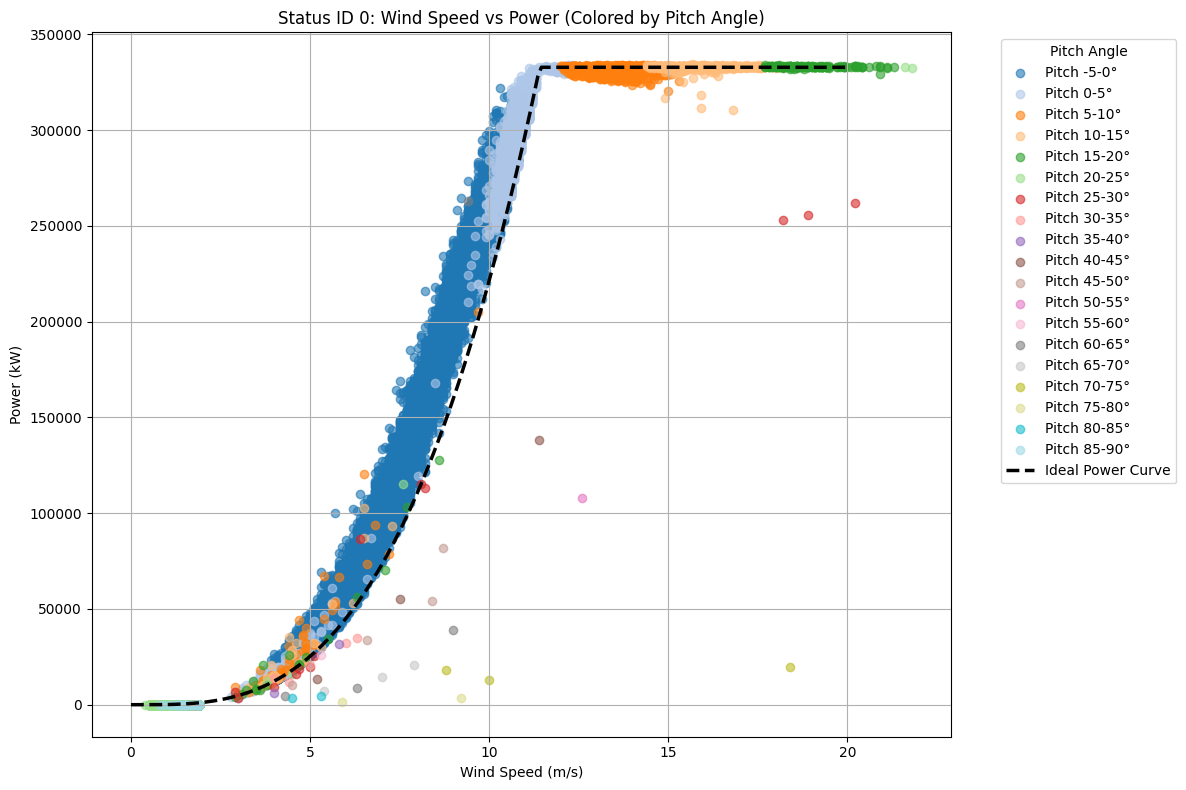

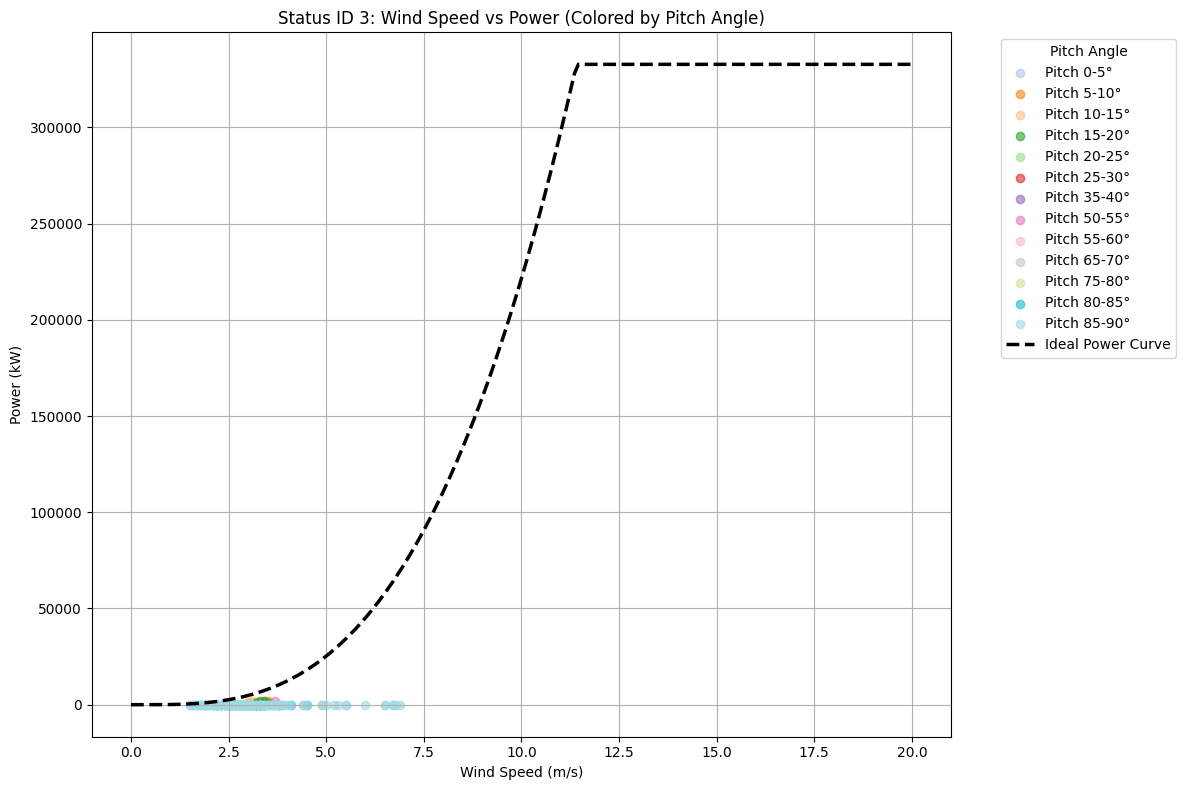

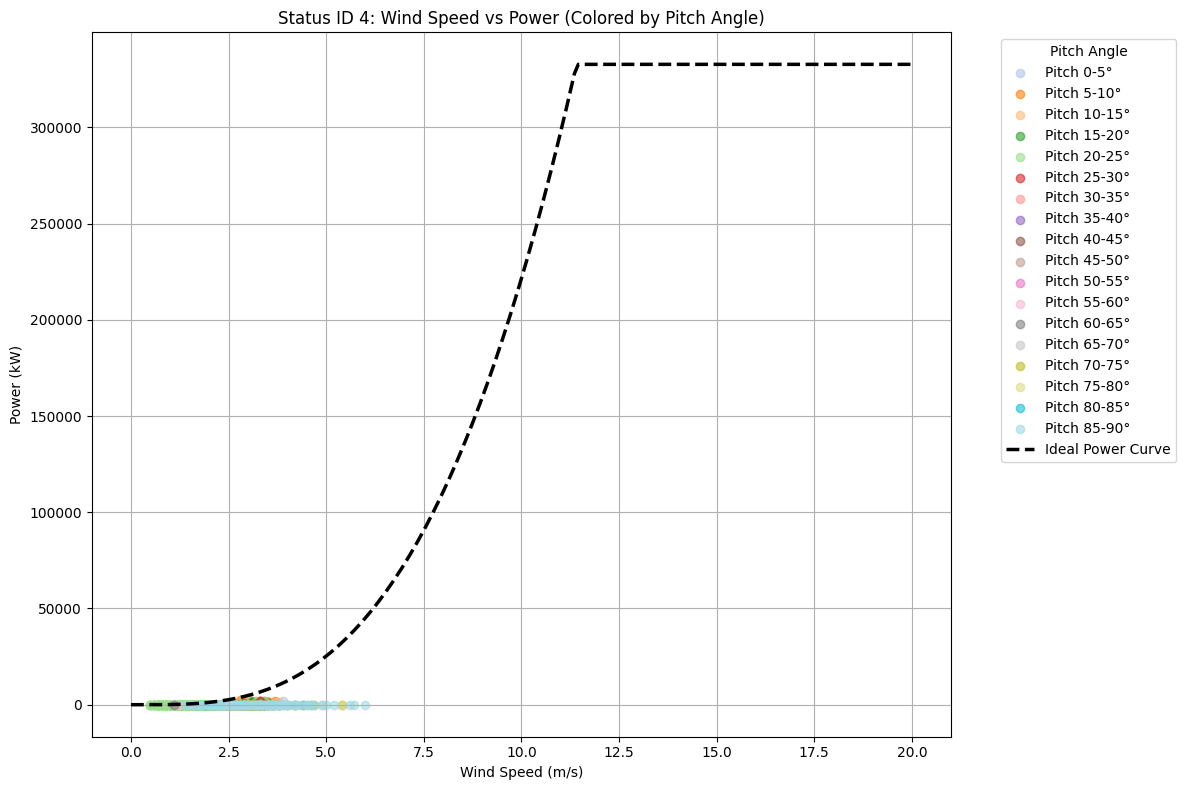

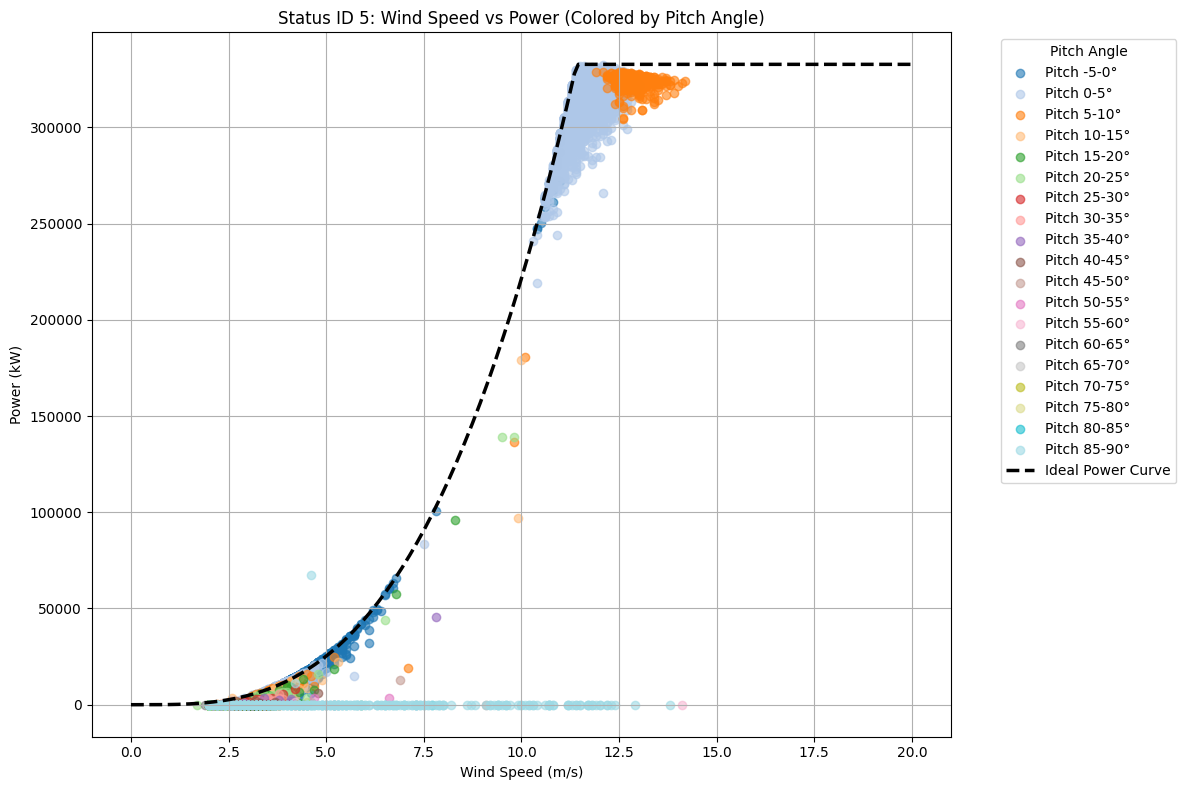

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Filter data
df_filtered = df[
    (df['sensor_5_avg'] <= 90) & 
    (df['sensor_5_avg'] >= -5) & 
    (df['sensor_2_avg'] >= -180) & 
    (df['sensor_2_avg'] <= 180)
].copy()

# Step 2: Create pitch angle bins (5° intervals)
pitch_bins = np.arange(-5, 95, 5)
pitch_labels = [f'{i}-{i+5}°' for i in pitch_bins[:-1]]
df_filtered['pitch_group'] = pd.cut(df_filtered['sensor_5_avg'], bins=pitch_bins, labels=pitch_labels, right=False)

# Step 3: Print value counts for each status
print("\nValue Counts of Each Status ID in Filtered Data:")
print(df_filtered['status_type_id'].value_counts().sort_index())

# Step 4: Define ideal power curve
wind_speeds = np.linspace(0, 20, 200)

ideal_power = np.piecewise(
    wind_speeds,
    [wind_speeds < cut_in,
     (wind_speeds >= cut_in) & (wind_speeds < rated_speed),
     wind_speeds >= rated_speed],
    [0,
     lambda x: rated_power * ((x - cut_in) / (rated_speed - cut_in))**3,
     rated_power]
)

# Step 5: Plot for each status ID using pitch group colors
status_ids = sorted(df_filtered['status_type_id'].unique())
colors = plt.cm.get_cmap('tab20', len(pitch_labels))

for status in status_ids:
    df_status = df_filtered[df_filtered['status_type_id'] == status]
    if df_status.empty:
        continue

    plt.figure(figsize=(12, 8))
    
    for i, label in enumerate(pitch_labels):
        group = df_status[df_status['pitch_group'] == label]
        group_sorted = group.sort_values(by='wind_speed_3_avg')
        if not group_sorted.empty:
            plt.scatter(group_sorted['wind_speed_3_avg'], group_sorted['sensor_50'],
                        color=colors(i), label=f'Pitch {label}', alpha=0.6)

    plt.plot(wind_speeds, ideal_power, color='black', linewidth=2.5, linestyle='--', label='Ideal Power Curve')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Power (kW)')
    plt.title(f'Status ID {status}: Wind Speed vs Power (Colored by Pitch Angle)')
    plt.legend(title='Pitch Angle', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
